## Project Objective
Using the data collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio.

### Variables  information:( meaning of all varibales )
#### Bank client data
- 1.age:Continuous feature 
- 2.job:Type of job (management, technician, entrepreneur, blue-collar, etc.)
- 3.marital: marital status(married, single, divorced)
- 4.education:education level (primary, secondary, tertiary)
- 5.default: has credit in default?
- 6.housing: has housing loan? 
- 7.loan: has personal loan?
- 8.balance in account
#### Related to previous contact:
- 9.contact: contact communication type
- 10.month: last contact month of year
- 11.day: last contact day of the month
- 12.duration: last contact duration, in seconds
#### Other attributes:
- 13.campaign: number of contacts performed during this campaign and for this client
- 14.pdays: number of days that passed by after the client was last contacted from a previous campaign(-1 tells us the person has not been contacted or contact period is beyond 900 days)
- 15.previous: number of contacts performed before this campaign and for this client
- 16.poutcome: outcome of the previous marketing campaign
#### Output variable (desired target):
- 17.Target: Tell us has the client subscribed a term deposit. (Yes, No)

##### Importing necessary libraries

In [612]:
import numpy as np
import pandas as pd
# importing ploting libraries
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas_profiling
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

from yellowbrick.classifier import ClassificationReport, ROCAUC

plt.style.use('ggplot')
pd.options.display.float_format = '{:,.2f}'.format
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
# calculate accuracy measures and confusion matrix
from sklearn import metrics

from scipy import stats
import numpy as np

In [613]:
data = pd.read_csv("bank_full.csv")

In [614]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [615]:
##cat_col has list of columns which are category in nature
## cont_col has list of numeric columns 
cat_col =data.loc[:, data.dtypes == 'object'].columns
cont_col =data.loc[:, data.dtypes == 'int64'].columns

In [616]:
## For Continous data descriptions ( count, mean, std, min, 25% , 50% (median), 75% max)
data_cont=data.describe().transpose().reset_index()

In [617]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,"45,211.00",40.94,10.62,18.00,33.00,39.00,48.00,95.00
balance,"45,211.00","1,362.27","3,044.77","-8,019.00",72.00,448.00,"1,428.00","102,127.00"
day,"45,211.00",15.81,8.32,1.00,8.00,16.00,21.00,31.00
duration,"45,211.00",258.16,257.53,0.00,103.00,180.00,319.00,"4,918.00"
campaign,"45,211.00",2.76,3.10,1.00,1.00,2.00,3.00,63.00
pdays,"45,211.00",40.20,100.13,-1.00,-1.00,-1.00,-1.00,871.00
previous,"45,211.00",0.58,2.30,0.00,0.00,0.00,0.00,275.00


In [618]:
list3=[]
for col in cont_col:
    list3.append([col,data[col].dtype,data[col].isna().sum(),round((data[col].isna().sum()/len(data[col])) * 100,2),data[col].nunique(),data[col].skew(),data[col].kurtosis()]);

data_cont2 = pd.DataFrame(columns=['Columns', 'DataType', 'IsNull', 'Null%', 'UniqueCount', 'skew','kurtosis'],
                     data=list3).reset_index()

In [619]:
data_cont3 = pd.concat([data_cont2,data_cont],axis=1)

In [620]:
data_cont3['range']=data_cont3['max']- data_cont3['min']

#### 1a. Univariate analysis –data types and description of the independent attributes which should include (name, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails)  for column meaning go to Variables information:( meaning of all varibales )
- Columns: column name
- DataType: datatype
- IsNull= how namy nulls are there
- Null% = Null percentage
- UniqueCount: Unique value count
- skew:tells about skewnes in data .If skewness is less than -1 or greater than 1, the distribution is highly skewed. If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.  Greater than 1 positive skewed, and less than -1 the negative skewed
- kurtosis:sharpness of the peak of a frequency-distribution curve
- count: total count of values
- mean: average
- std: standard deviation
- min: minimum value
- 25%: 25 percentile
- 50%: 50th percentile and mode
- 75%: 75th percentile
- max: maximum value
- range: range 

###### There is no missing value in numeric variables.

In [621]:
## All numeric Columns
cont_col

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [622]:
data_cont3 =data_cont3.drop(columns = 'index')
data_cont3 

,Columns,DataType,IsNull,Null%,UniqueCount,skew,kurtosis,count,mean,std,min,25%,50%,75%,max,range
0,age,int64,0,0.00,77,0.68,0.32,"45,211.00",40.94,10.62,18.00,33.00,39.00,48.00,95.00,77.00
1,balance,int64,0,0.00,7168,8.36,140.75,"45,211.00","1,362.27","3,044.77","-8,019.00",72.00,448.00,"1,428.00","102,127.00","110,146.00"
2,day,int64,0,0.00,31,0.09,-1.06,"45,211.00",15.81,8.32,1.00,8.00,16.00,21.00,31.00,30.00
3,duration,int64,0,0.00,1573,3.14,18.15,"45,211.00",258.16,257.53,0.00,103.00,180.00,319.00,"4,918.00","4,918.00"
4,campaign,int64,0,0.00,48,4.90,39.25,"45,211.00",2.76,3.10,1.00,1.00,2.00,3.00,63.00,62.00
5,pdays,int64,0,0.00,559,2.62,6.94,"45,211.00",40.20,100.13,-1.00,-1.00,-1.00,-1.00,871.00,872.00
6,previous,int64,0,0.00,41,41.85,"4,506.86","45,211.00",0.58,2.30,0.00,0.00,0.00,0.00,275.00,275.00


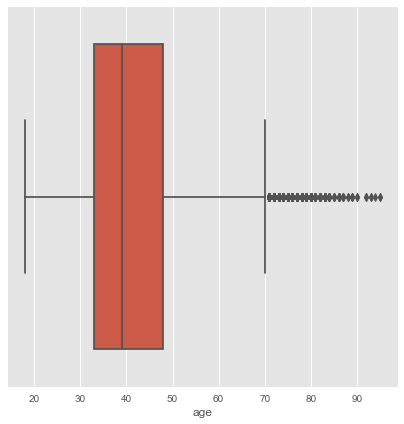

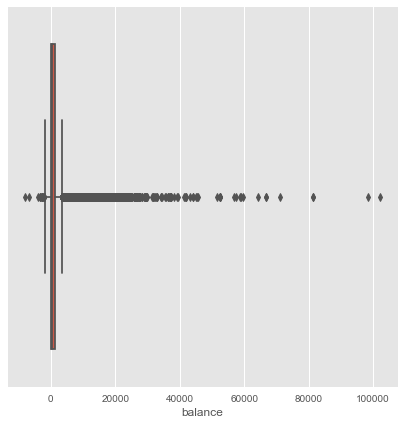

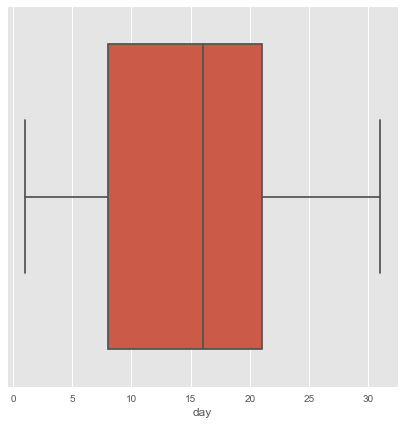

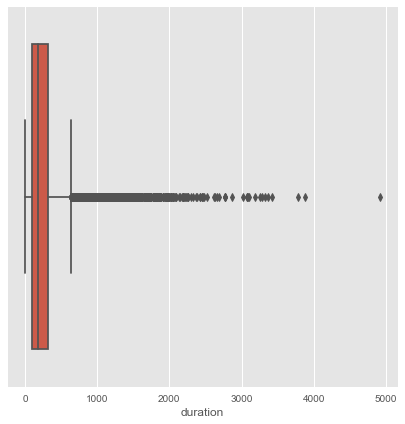

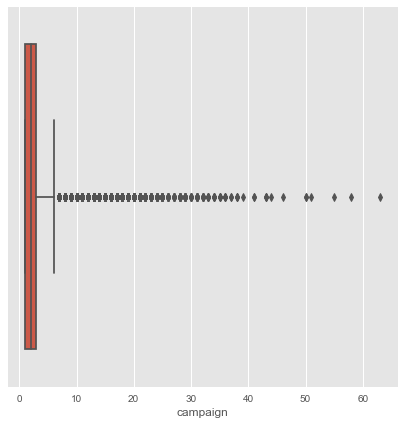

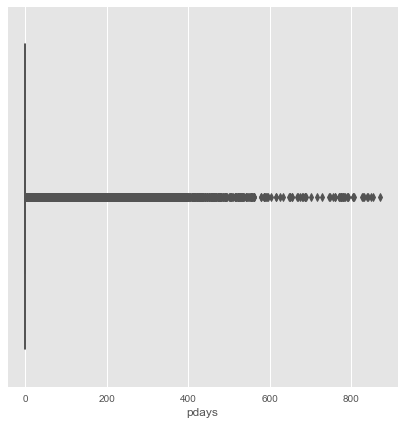

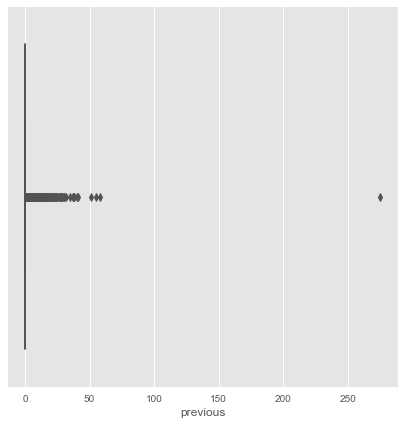

In [623]:
for i in cont_col:
    f,(ax1) =plt.subplots(1, figsize=(7,7))
    sns.boxplot(data[i])

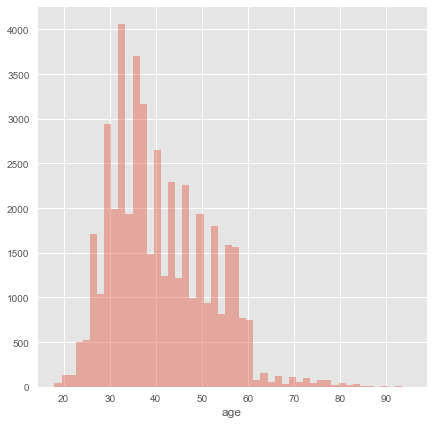

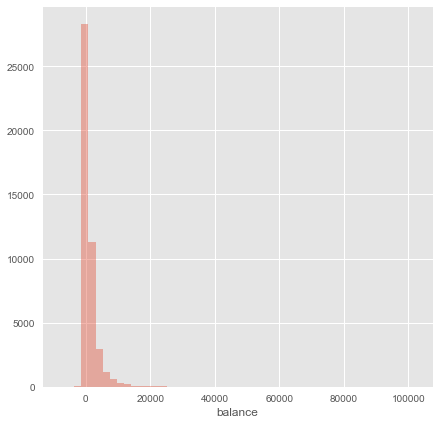

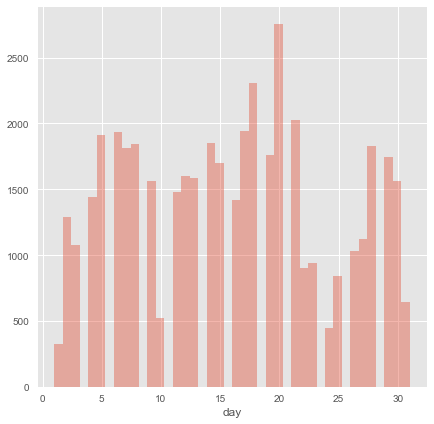

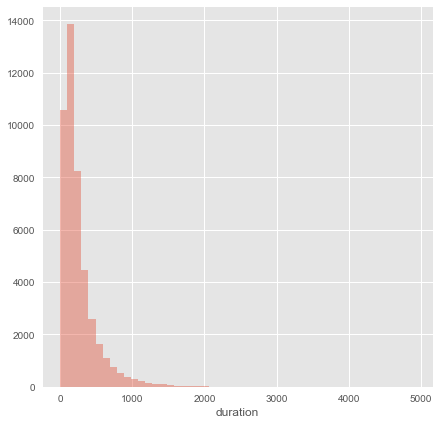

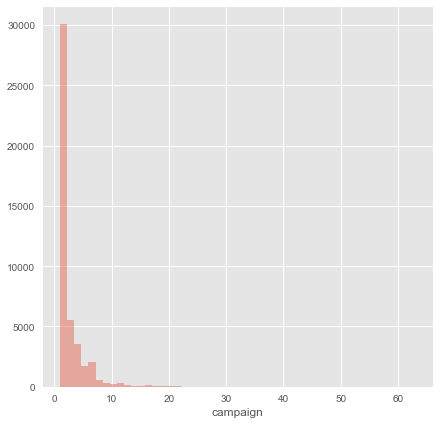

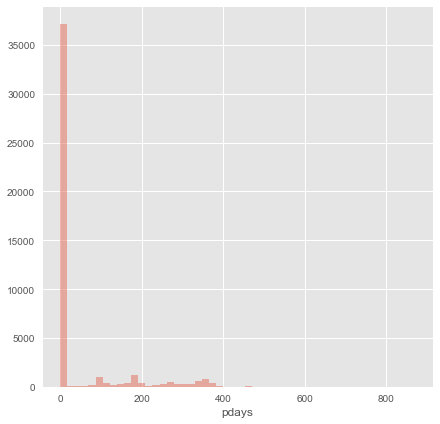

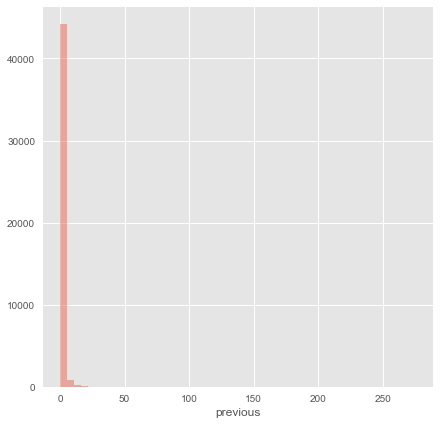

In [624]:
for i in cont_col:
    f,(ax1) =plt.subplots(1, figsize=(7,7))
    sns.distplot(data[i], kde = False)

#### Univariate Analysis of Categorical variable

In [625]:
for i in cat_col:
    print(i)
    
    print(data[i].value_counts())
    print()
    print()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


marital
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


default
no     44396
yes      815
Name: default, dtype: int64


housing
yes    25130
no     20081
Name: housing, dtype: int64


loan
no     37967
yes     7244
Name: loan, dtype: int64


contact
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64


month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64


poutcome
unknown    36959

In [626]:
for i in cat_col:
    print(i)
    
    print(data[i].value_counts(normalize= True))
    print()
    print()

job
blue-collar     0.22
management      0.21
technician      0.17
admin.          0.11
services        0.09
retired         0.05
self-employed   0.03
entrepreneur    0.03
unemployed      0.03
housemaid       0.03
student         0.02
unknown         0.01
Name: job, dtype: float64


marital
married    0.60
single     0.28
divorced   0.12
Name: marital, dtype: float64


education
secondary   0.51
tertiary    0.29
primary     0.15
unknown     0.04
Name: education, dtype: float64


default
no    0.98
yes   0.02
Name: default, dtype: float64


housing
yes   0.56
no    0.44
Name: housing, dtype: float64


loan
no    0.84
yes   0.16
Name: loan, dtype: float64


contact
cellular    0.65
unknown     0.29
telephone   0.06
Name: contact, dtype: float64


month
may   0.30
jul   0.15
aug   0.14
jun   0.12
nov   0.09
apr   0.06
feb   0.06
jan   0.03
oct   0.02
sep   0.01
mar   0.01
dec   0.00
Name: month, dtype: float64


poutcome
unknown   0.82
failure   0.11
other     0.04
success   0.03
Name: po

In [627]:
for i in cat_col:
    print(i)
    
    print(data[i].value_counts(normalize= True))
    print()
    print()

job
blue-collar     0.22
management      0.21
technician      0.17
admin.          0.11
services        0.09
retired         0.05
self-employed   0.03
entrepreneur    0.03
unemployed      0.03
housemaid       0.03
student         0.02
unknown         0.01
Name: job, dtype: float64


marital
married    0.60
single     0.28
divorced   0.12
Name: marital, dtype: float64


education
secondary   0.51
tertiary    0.29
primary     0.15
unknown     0.04
Name: education, dtype: float64


default
no    0.98
yes   0.02
Name: default, dtype: float64


housing
yes   0.56
no    0.44
Name: housing, dtype: float64


loan
no    0.84
yes   0.16
Name: loan, dtype: float64


contact
cellular    0.65
unknown     0.29
telephone   0.06
Name: contact, dtype: float64


month
may   0.30
jul   0.15
aug   0.14
jun   0.12
nov   0.09
apr   0.06
feb   0.06
jan   0.03
oct   0.02
sep   0.01
mar   0.01
dec   0.00
Name: month, dtype: float64


poutcome
unknown   0.82
failure   0.11
other     0.04
success   0.03
Name: po

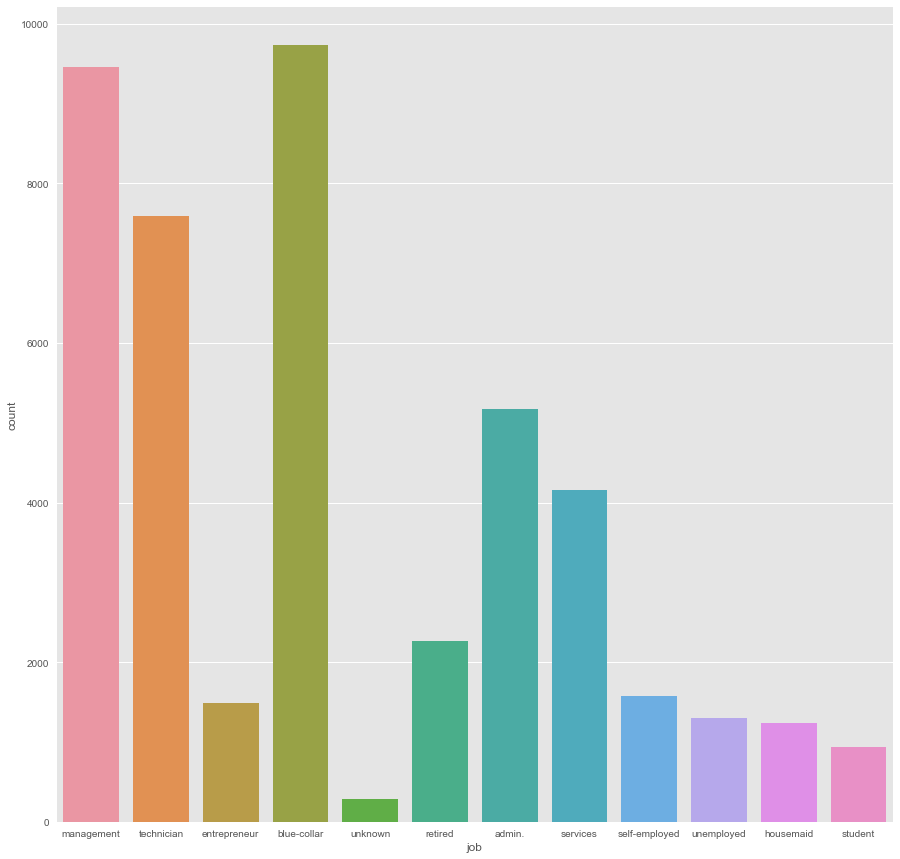

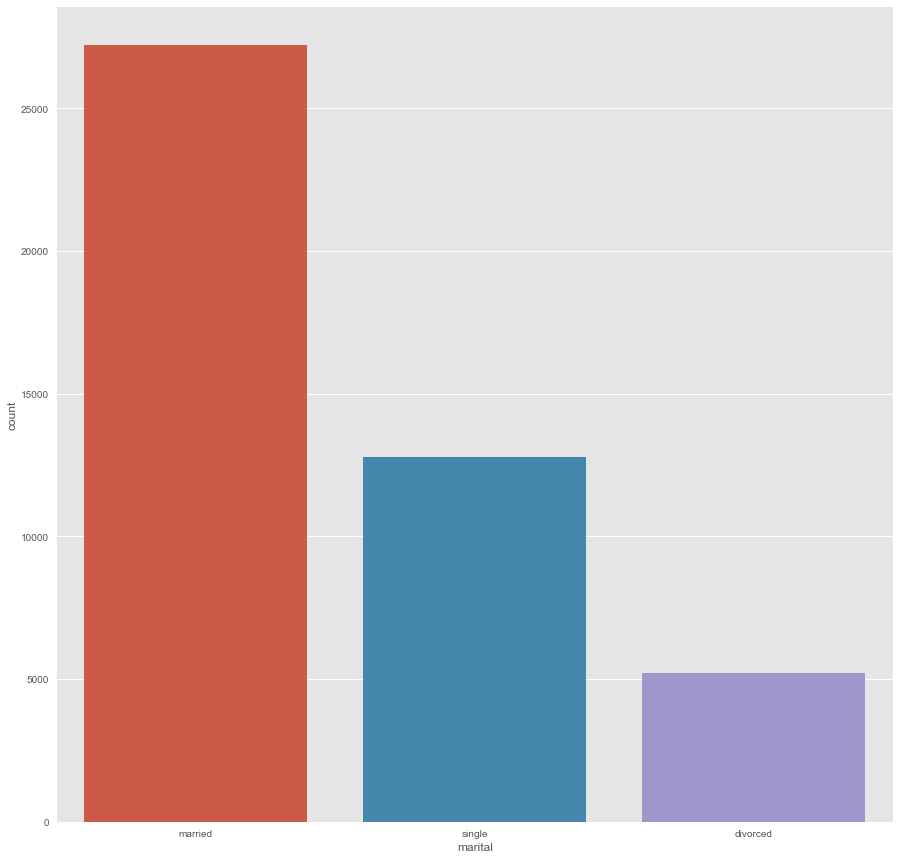

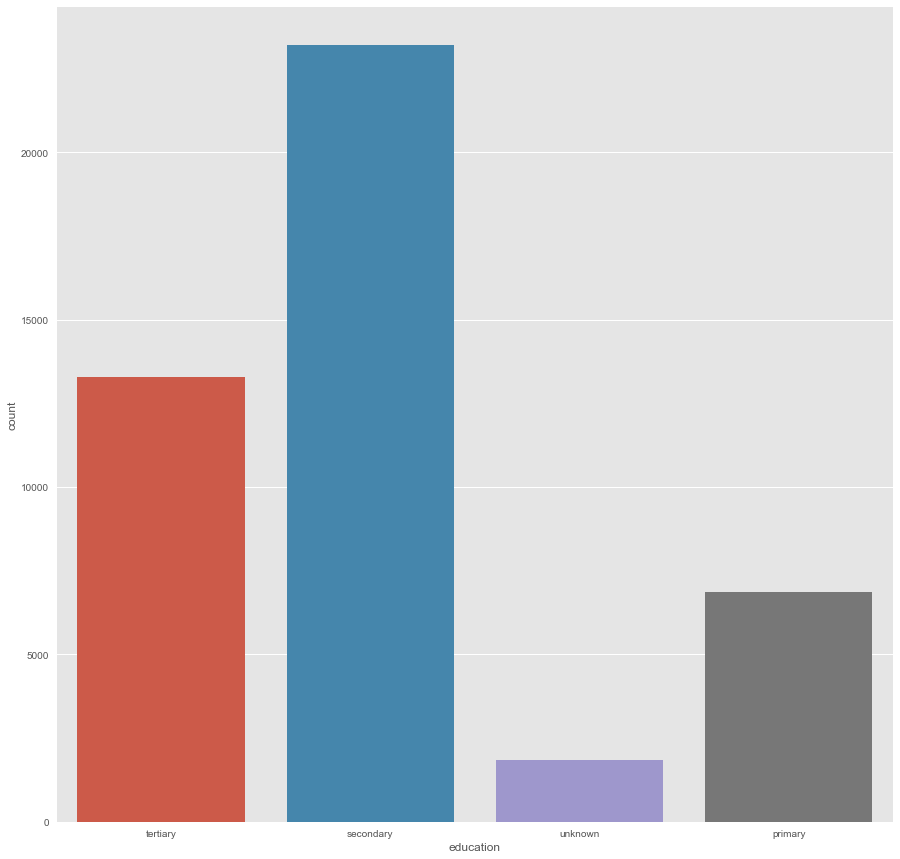

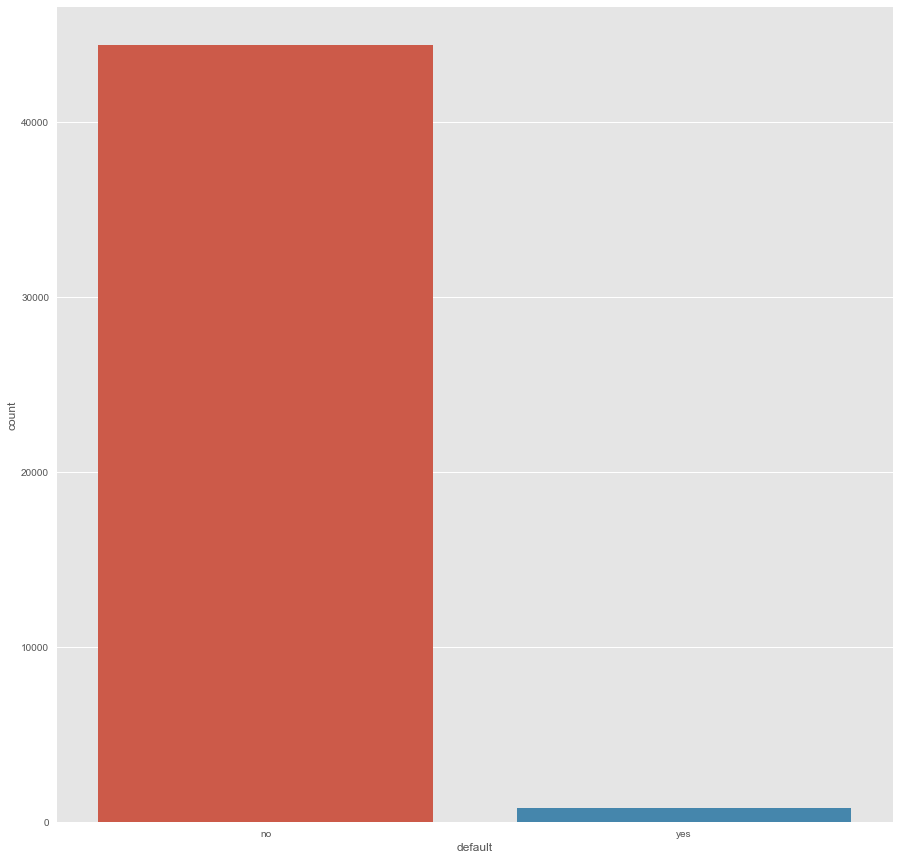

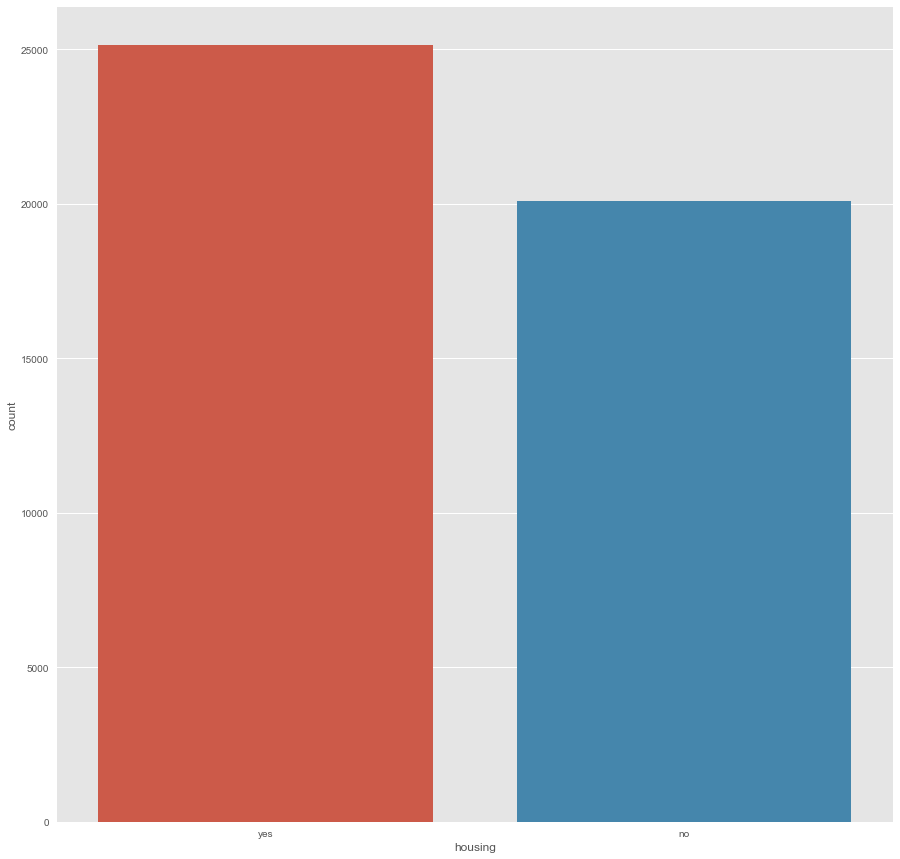

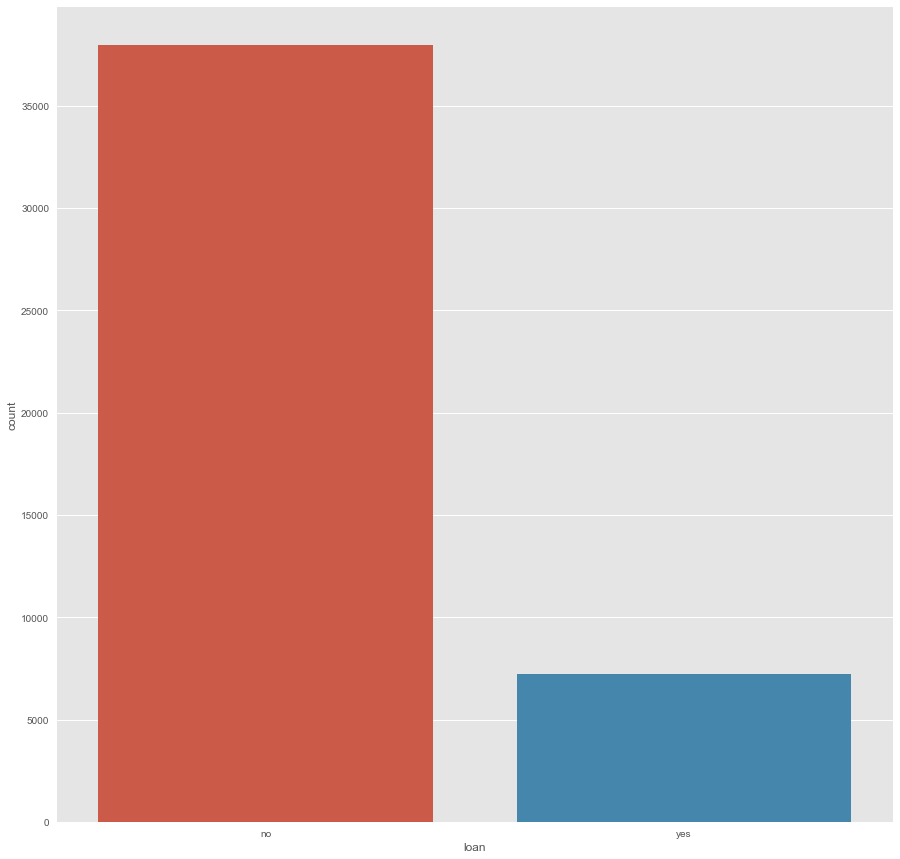

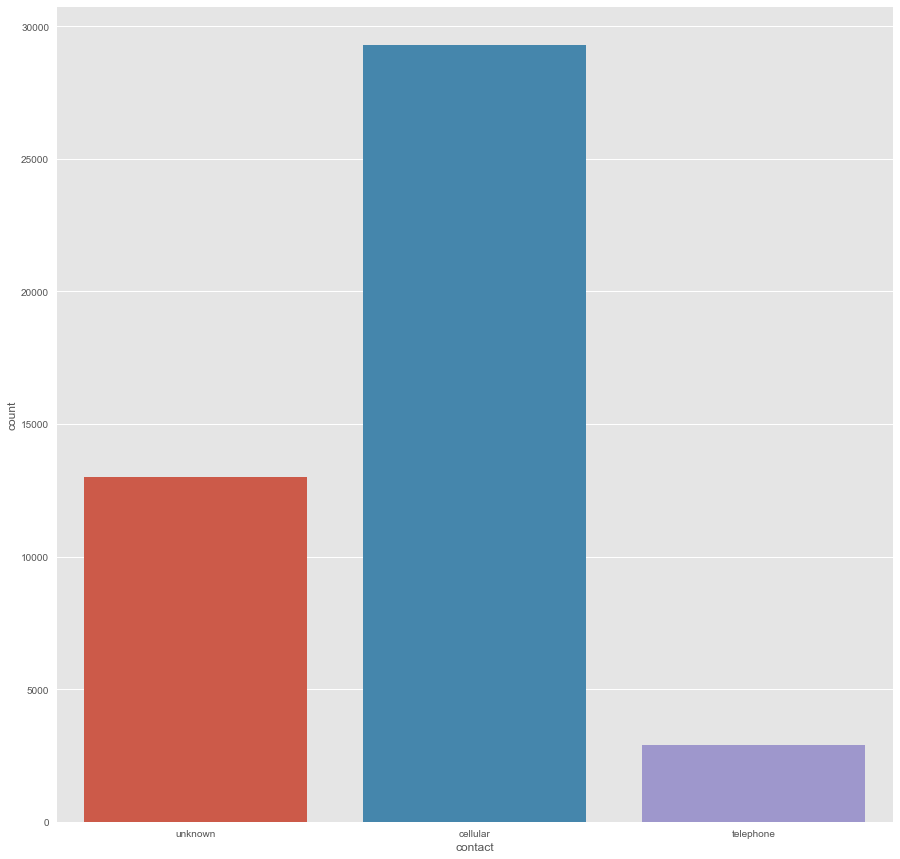

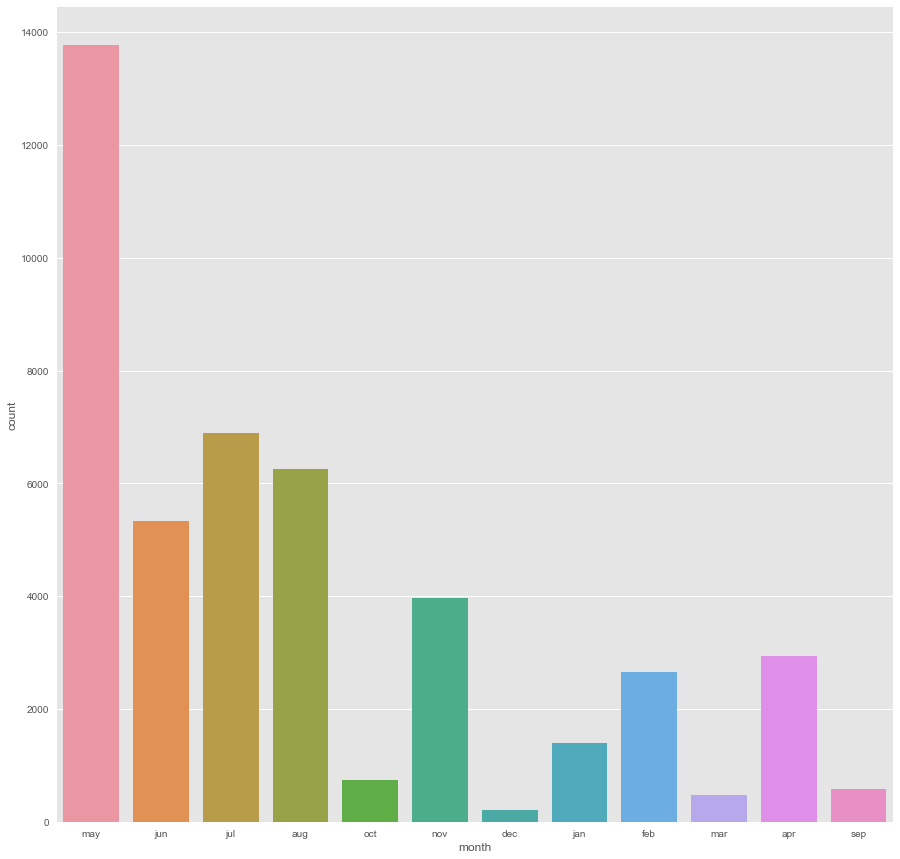

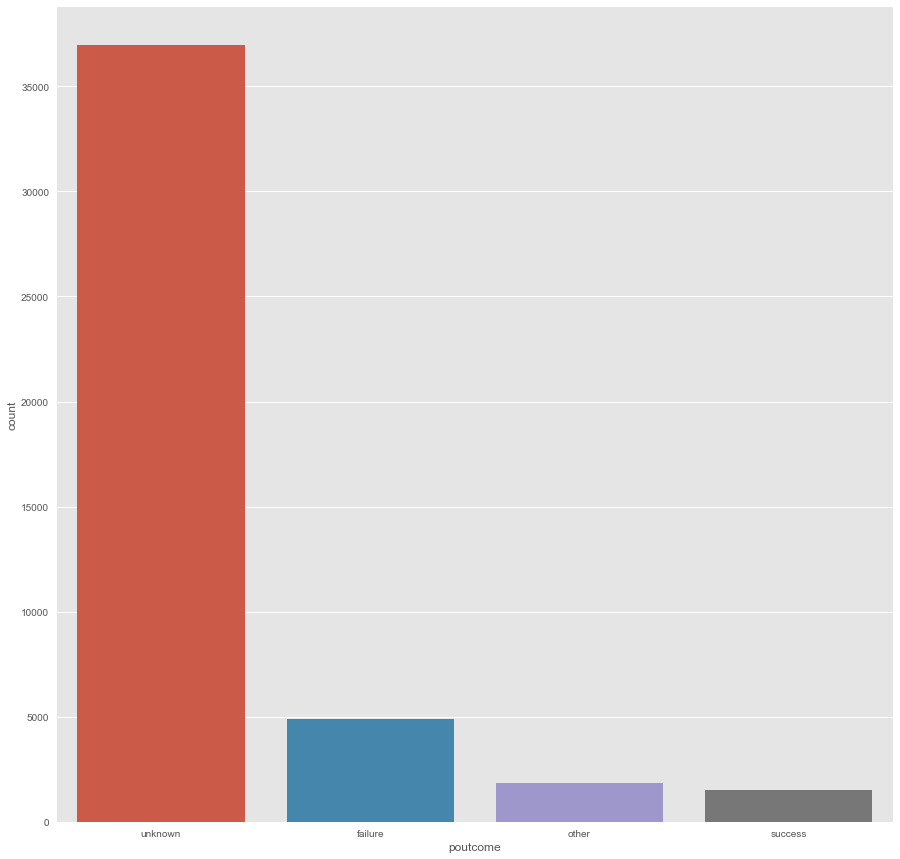

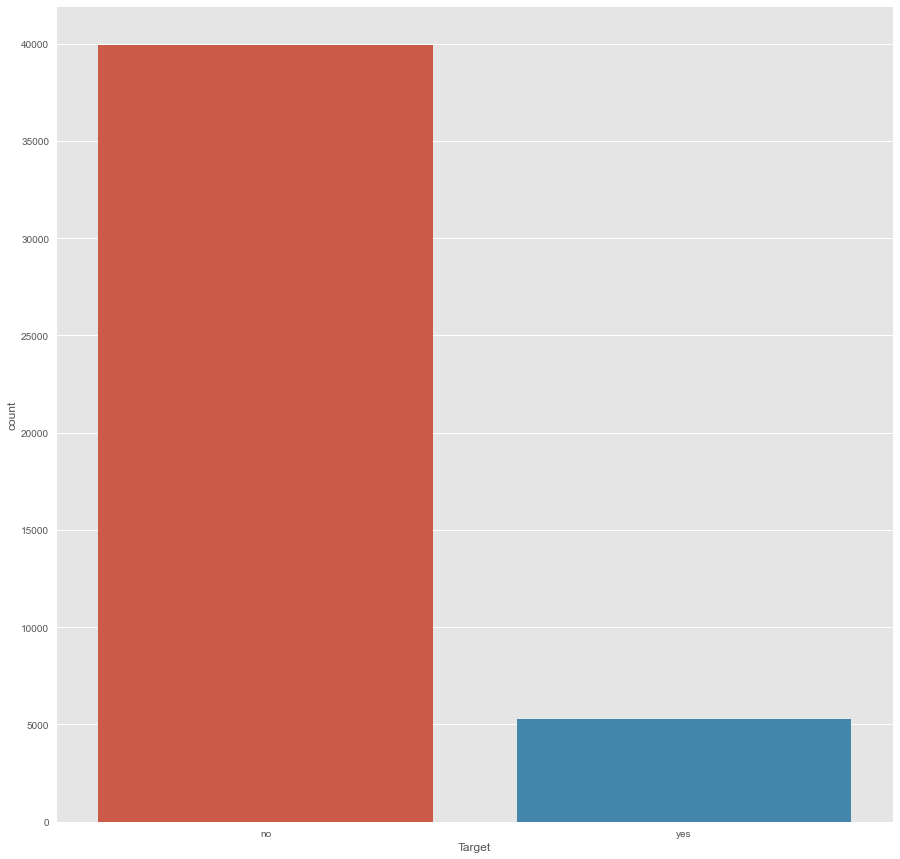

In [628]:
for i in cat_col:
    f,(ax1) =plt.subplots(1, figsize=(15,15))
    sns.countplot(data[i])

- Job , education and contact has unknown values 
- poutcomehas 82% of unknown values

### 2 Multivariate Anlaysis

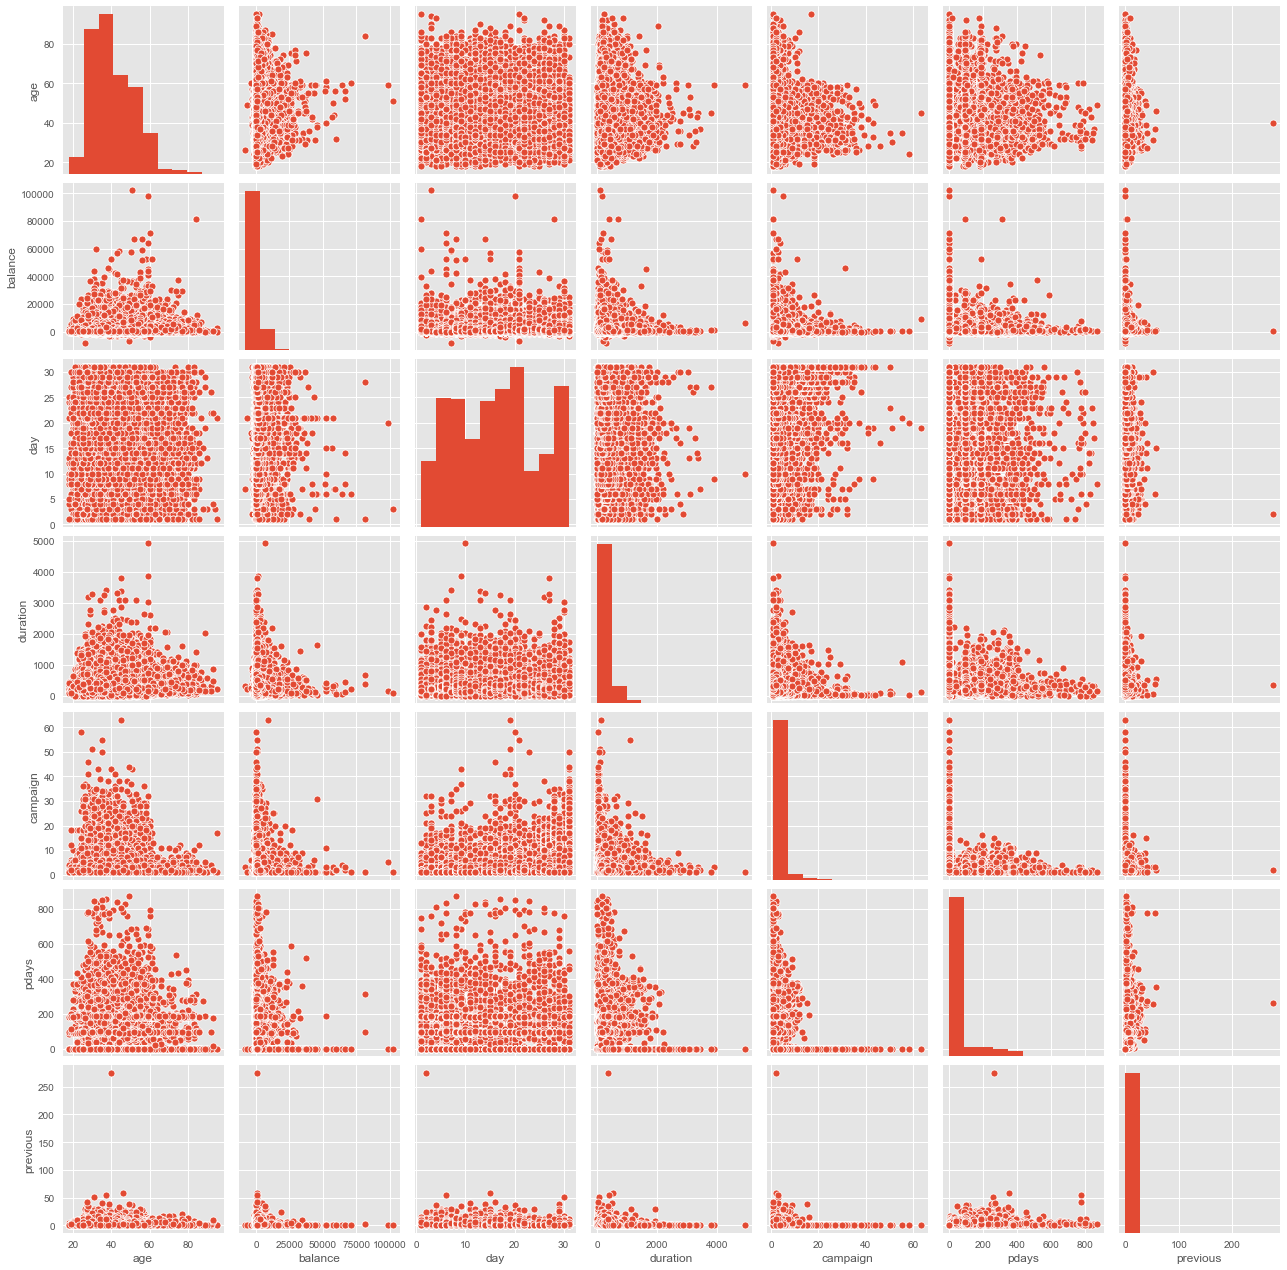

In [629]:
sns.pairplot(data)

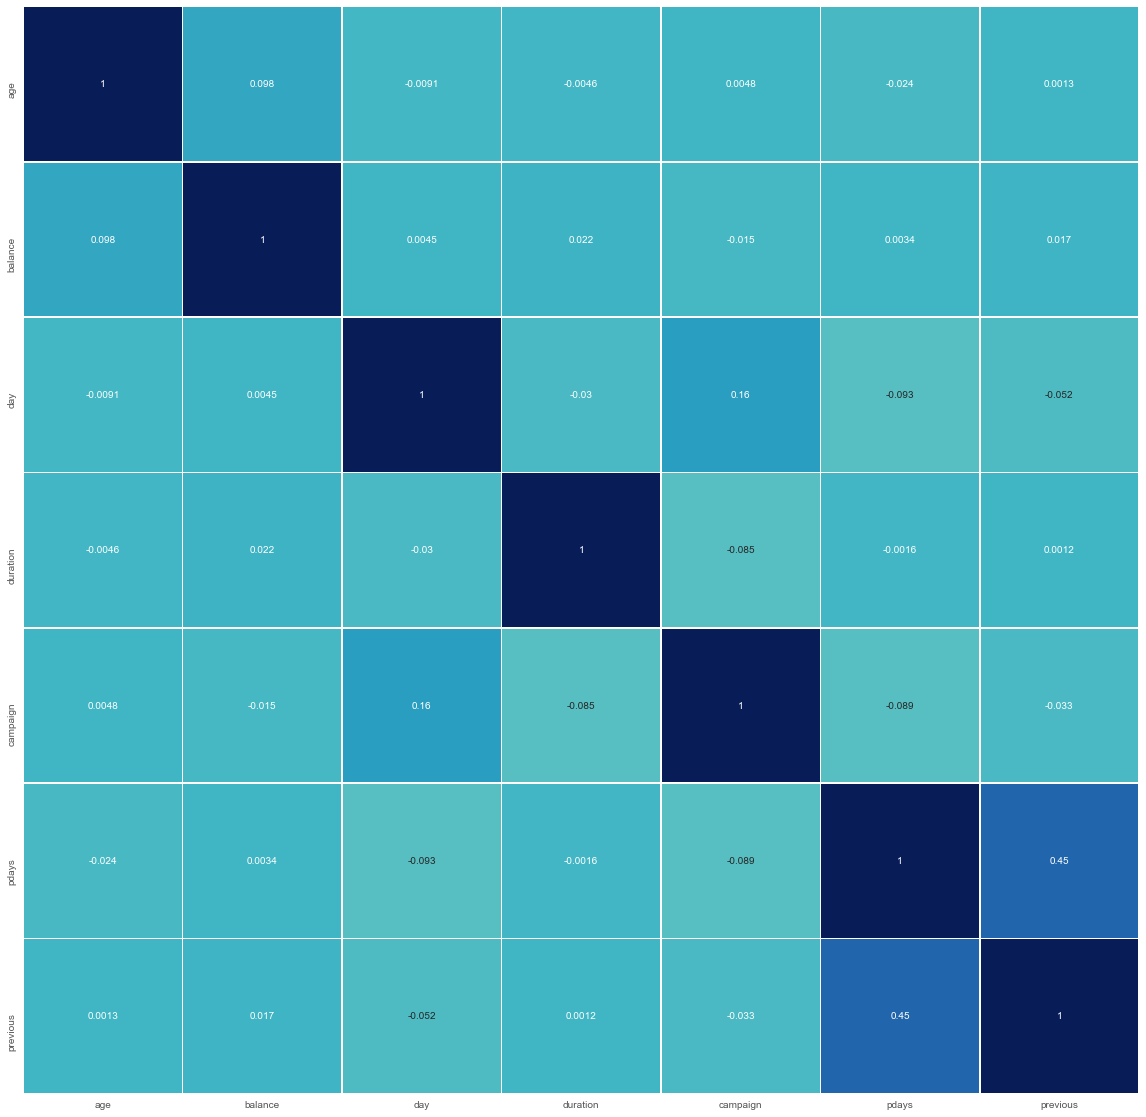

In [630]:
plt.figure(figsize=(20,20))

sns.heatmap(data.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()

Bivariate Ananlysis for categorical variable

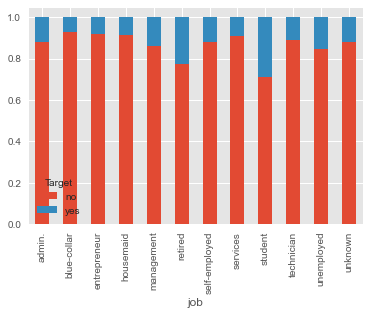

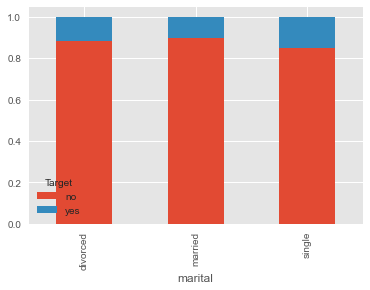

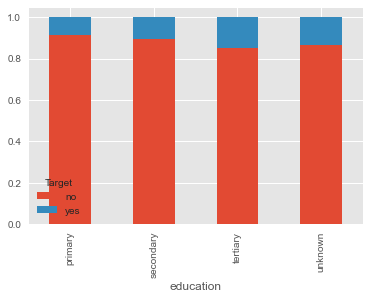

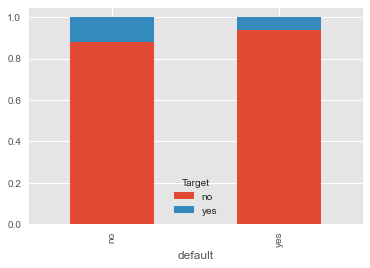

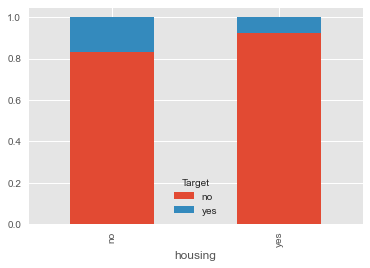

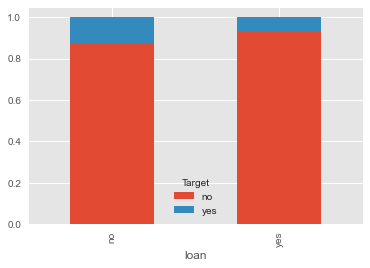

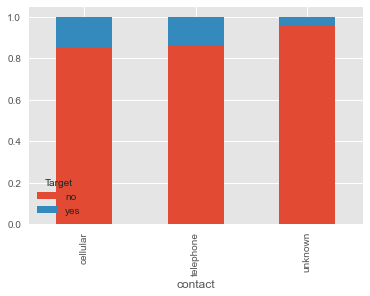

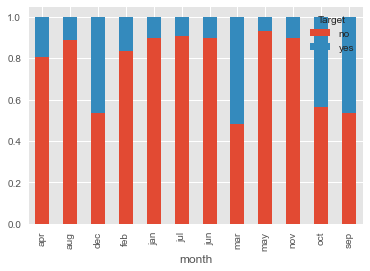

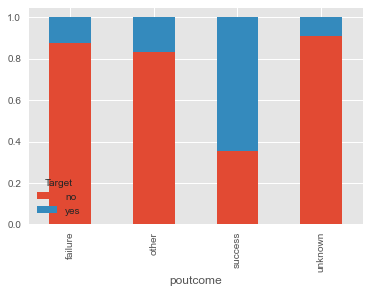

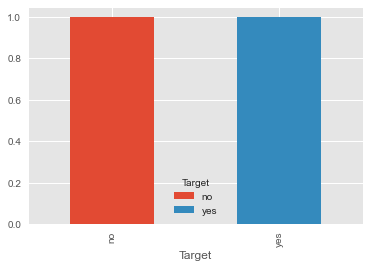

In [632]:
for i in cat_col:
    
    education=pd.crosstab(data[i],data['Target'])
    education.div(education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
    


- looks like Mostly  retired and student enrolled for term deposit more compare to others 
- looks like wow has tertiary education enroll for term deposit more compare to other ingnoring unknown as of now
- looks like who default ,housing,loan has lower enrollment for term deposit 
- looks like poutcome who has success has higher enrollment to term deposit ignoring unkown 
- Most important target is imbalanced 88% is no and 12 is Yes , higly imbalanced data

Bivariate Ananlysis for continous variable

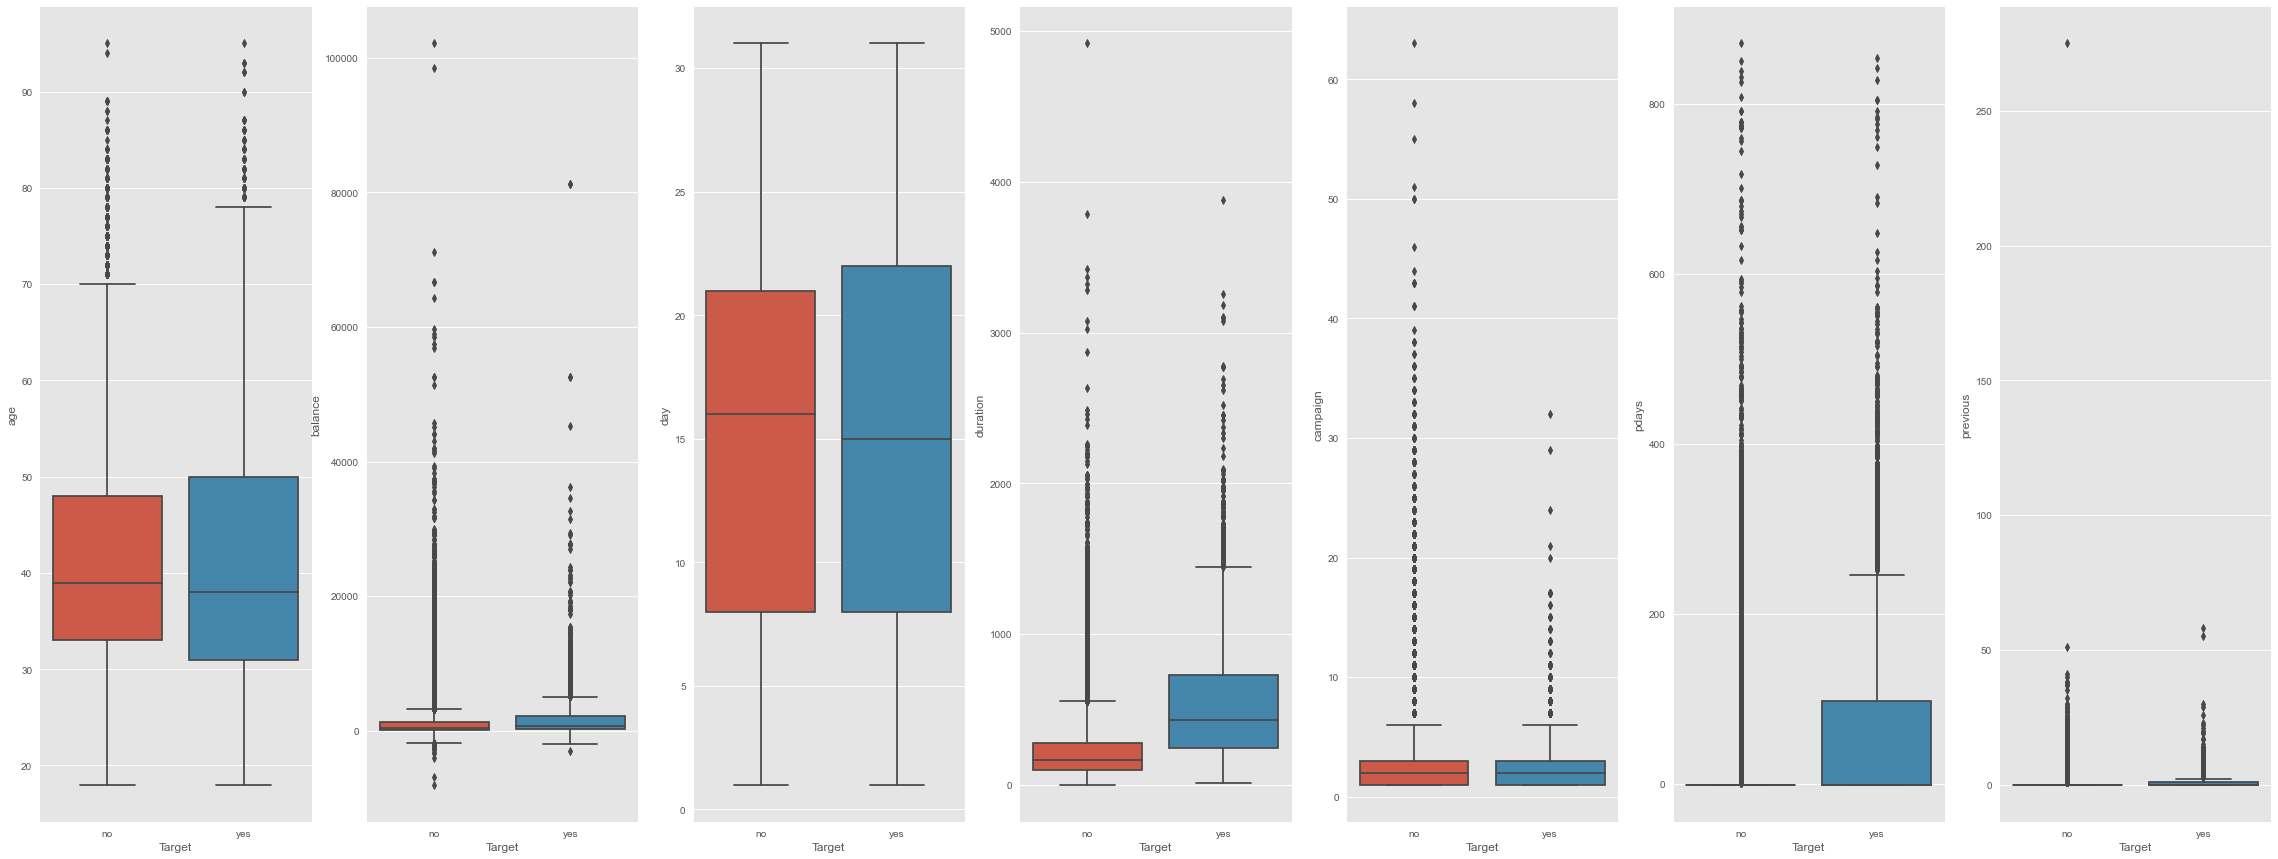

In [633]:
### Bivariate analysis 
# Create boxplots to understand differences in distributions among people with and without diabetes
fig, axs = plt.subplots(ncols = len(cont_col), figsize = (40, 15))
for idx, field in enumerate(cont_col):
    sns.boxplot(x = 'Target', 
                y = field, 
                data = data,
                ax = axs[idx])
## days show high spread has bigger IQR.

In [634]:
data.groupby(["Target"]).mean()

,age,balance,day,duration,campaign,pdays,previous
Target,,,,,,,
no,40.84,"1,303.71",15.89,221.18,2.85,36.42,0.50
yes,41.67,"1,804.27",15.16,537.29,2.14,68.70,1.17


In [635]:
data.groupby(["Target"]).median()

,age,balance,day,duration,campaign,pdays,previous
Target,,,,,,,
no,39,417,16,164,2,-1,0
yes,38,733,15,426,2,-1,0


- Looking at median values , one with higher balance has enrolled for term deposit
- Looking at median values , one with higher call duration has enrolled fro term deposit , it seems practical too, one who shows some interest you talk more to convince them 

Ensure the attribute types are correct. If not, take appropriate actions

In [636]:
cat_col

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'Target'],
      dtype='object')

Missing value treatment

In [637]:
##replacing unknown with mode
data['job_modified'] = data['job'].replace(['unknown'],'blue-collar') 
data['education_modified'] = data['education'].replace(['unknown'],'secondary')
data['contact_modified'] = data['contact'].replace(['unknown'],'cellular')

C:\Users\16099\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\16099\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


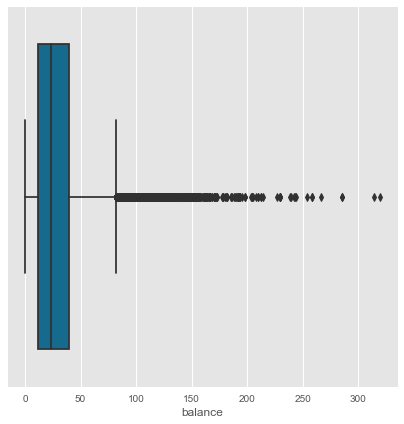

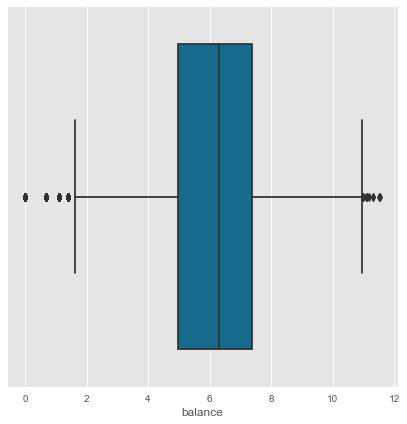

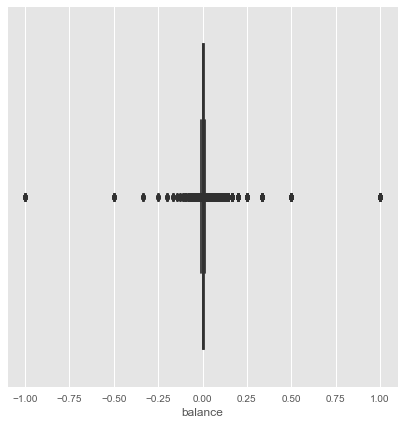

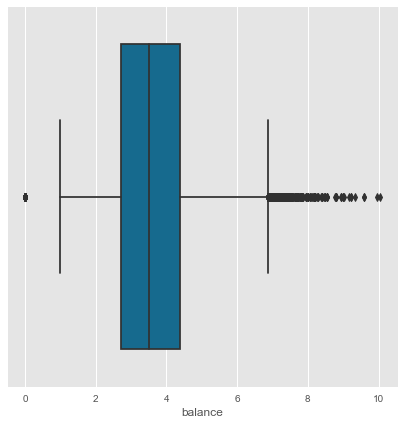

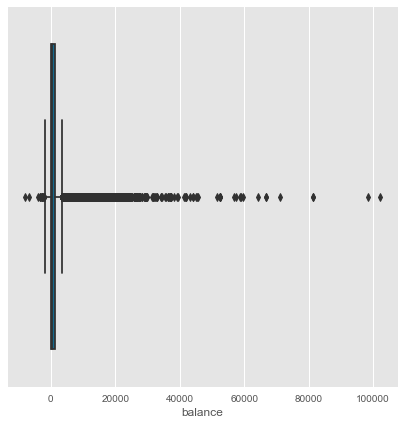

In [638]:
## Outlier treatment
balance_Log =np.log(data['balance'] +1)
balance_Inverse =1/(data['balance'] +1)
balance_root =data['balance']**(1/2)
balance_exp =data['balance'] **(1/5)
balance= data['balance']
cat=[balance_root,balance_Log,balance_Inverse,balance_exp,balance]
for i in cat:
    f,(ax1) =plt.subplots(1, figsize=(7,7))
    sns.boxplot(i, color ="b")
##balance_Inverse looks beter as compare to other

In [639]:
# create an object of the OneHotEncoder
oneHotCols =['job_modified', 'marital', 'education_modified', 'default', 'housing', 'loan','contact_modified',
        'month',  'Target']

In [640]:
###Creating new dataframe with onehot encoding 
data2=pd.get_dummies(data, columns=oneHotCols,drop_first=True)
data2.head(2)

,age,job,education,balance,contact,day,duration,campaign,pdays,previous,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,Target_yes
0,58,management,tertiary,2143,unknown,5,261,1,-1,0,...,0,0,0,0,0,1,0,0,0,0
1,44,technician,secondary,29,unknown,5,151,1,-1,0,...,0,0,0,0,0,1,0,0,0,0


In [546]:
data['poutcome'].value_counts(normalize = True)

unknown   0.82
failure   0.11
other     0.04
success   0.03
Name: poutcome, dtype: float64

82% of unknown value hence droping a poutcome columns and also droping job, education and contact as those information is captured in modified columns

In [641]:
data2=data2.drop(columns=['job','education','contact','poutcome'])

In [642]:
data2.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_modified_blue-collar', 'job_modified_entrepreneur',
       'job_modified_housemaid', 'job_modified_management',
       'job_modified_retired', 'job_modified_self-employed',
       'job_modified_services', 'job_modified_student',
       'job_modified_technician', 'job_modified_unemployed', 'marital_married',
       'marital_single', 'education_modified_secondary',
       'education_modified_tertiary', 'default_yes', 'housing_yes', 'loan_yes',
       'contact_modified_telephone', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'Target_yes'],
      dtype='object')

In [643]:
correlation_values=data2.corr()['Target_yes']
correlation_values.abs().sort_values(ascending=False)

Target_yes                     1.00
duration                       0.39
housing_yes                    0.14
month_mar                      0.13
month_oct                      0.13
month_sep                      0.12
pdays                          0.10
month_may                      0.10
previous                       0.09
job_modified_retired           0.08
job_modified_student           0.08
month_dec                      0.08
campaign                       0.07
job_modified_blue-collar       0.07
loan_yes                       0.07
education_modified_tertiary    0.07
marital_single                 0.06
marital_married                0.06
balance                        0.05
month_feb                      0.04
month_jul                      0.03
job_modified_management        0.03
education_modified_secondary   0.03
day                            0.03
job_modified_services          0.03
age                            0.03
default_yes                    0.02
job_modified_unemployed     

Create the training set and test set in ratio of 70:30

In [644]:
X = data2.drop("Target_yes" , axis=1)
y = data2.pop("Target_yes")

Transform the data i.e. scale / normalize if required

In [645]:
from sklearn import preprocessing
col_names=data2.columns
scaler=preprocessing.StandardScaler()
scaled_X=scaler.fit_transform(X)


Create the training set and test set in ratio of 70:30

In [646]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=.30, random_state=1)

### 1. First create models using Logistic Regression and Decision Tree algorithm. Note the model performance by using different matrices. Use confusion matrix to evaluate class level metrics i.e. Precision/Recall. Also reflect the accuracy and F1 score of the model.

Logistic Regression

In [647]:
## necessary libraried for mdel building
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score

In [648]:
## Accuracy is hit when tried to balanced the data

logreg1 = LogisticRegression(random_state=42,class_weight= 'balanced')
logreg1.fit(X_train, y_train)
print("Testing accuracy",logreg1.score(X_test, y_test))

Testing accuracy 0.8213653789442642


In [649]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [650]:
y_predict = logreg.predict(X_test)

In [651]:
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted, [1,0] )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["term Deposit", "No Term deposit"] , yticklabels = ["term Deposit", "No Term deposit"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [652]:
pd.crosstab(y_test, y_predict, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,11693,320
1,1137,414


Trainig accuracy 0.893828798938288

Testing accuracy 0.8925833087584784

Confusion Matrix


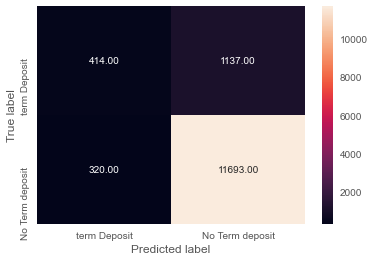

None

Recall: 0.26692456479690524

Precision: 0.5640326975476839

F1 Score: 0.362363238512035

Roc Auc Score: 0.6201433778783494


In [653]:
print("Trainig accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

###Looking at confusion matrix we can see 1137 is incorrectly classified as not going for term deposit , so we are going to loose lot of customers than 

In [654]:
acc_LR = logreg.score(X_test, y_test)

In [655]:
resultsDf = pd.DataFrame({'Method':['Logistic Regression'], 'accuracy': acc_LR})
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logistic Regression,0.89


C:\Users\16099\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


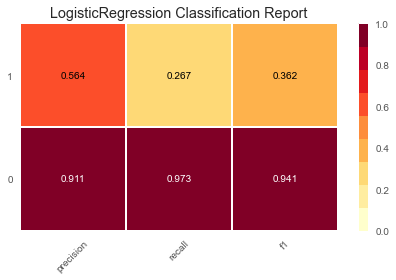

C:\Users\16099\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


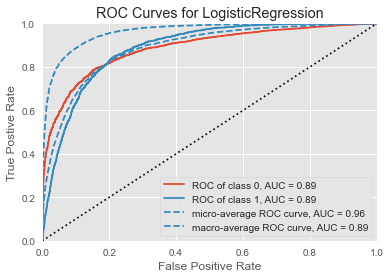

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Postive Rate'>

In [656]:
from yellowbrick.classifier import ClassificationReport, ROCAUC
# Visualize model performance with yellowbrick library
viz = ClassificationReport(logreg)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(logreg)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

Through logistic default model we are geting below information 

- Trainig accuracy 0.9025816033115304
- Testing accuracy 0.9023886759068122
- Recall: 0.35009671179883944
- Precision: 0.6321303841676368
- F1 Score: 0.4506224066390041
- Roc Auc Score: 0.6618959376858178

Decision Tree

In [657]:

from sklearn.tree import DecisionTreeClassifier

In [658]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. Other option 
# could be gini index.  

model_entropy = DecisionTreeClassifier(criterion='entropy')

In [659]:
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [660]:
print("Train: %.2f" % model_entropy.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % model_entropy.score(X_test, y_test))  # performance on test data

Train: 1.00
Test: 0.87


#### There is a high degree of overfitting in the model due to which the test accuracy drops drastically. This shows why decision trees are prone to overfitting. 

In [661]:
clf_pruned = DecisionTreeClassifier(criterion = "entropy", max_depth=3)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [662]:
print("Train: %.2f" % clf_pruned.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % clf_pruned.score(X_test, y_test))  # performance on test data

Train: 0.89
Test: 0.89


In [663]:
preds_train = clf_pruned.predict(X_train)
preds_test = clf_pruned.predict(X_test)

acc_DT = accuracy_score(y_test, preds_test)

In [664]:
# Confusion matrix
pd.crosstab(y_test, preds_test, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,11794,219
1,1277,274


C:\Users\16099\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


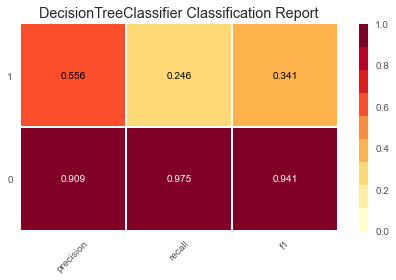

C:\Users\16099\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


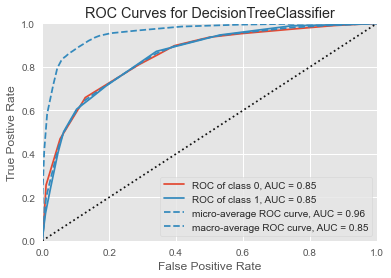

<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Postive Rate'>

In [665]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(DecisionTreeClassifier(criterion = "entropy", max_depth=4))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(DecisionTreeClassifier(criterion = "entropy", max_depth=4))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

In [666]:
features = [col for col in data2.columns if col != 'Target_yes']
## Calculating feature importance

feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)


feat_imp_dict = dict(zip(features, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
duration,0.84
pdays,0.16
age,0.00
month_feb,0.00
default_yes,0.00
housing_yes,0.00
loan_yes,0.00
contact_modified_telephone,0.00
month_aug,0.00
month_dec,0.00


In [667]:
## Store accuracy result
tempResultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': [acc_DT]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logistic Regression,0.89
0,Decision Tree,0.89


###  2. Build the ensemble models (Bagging and Boosting) and note the model performance by using different matrices. Use same metrics as in above model. (at least 3 algorithms)

Random Forest 

In [668]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)

In [669]:
pred_RF = rfcl.predict(X_test)
acc_RF = accuracy_score(y_test, pred_RF)

In [670]:
# Confusion matrix
pd.crosstab(y_test, pred_RF, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,11638,375
1,970,581


In [671]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logistic Regression,0.89
0,Decision Tree,0.89
0,Random Forest,0.90


C:\Users\16099\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


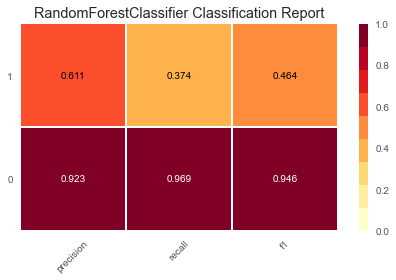

C:\Users\16099\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


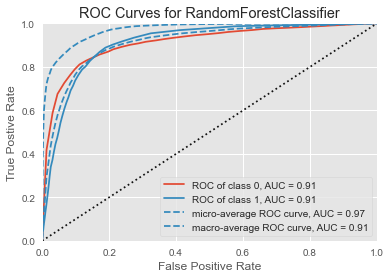

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Postive Rate'>

In [672]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(RandomForestClassifier(n_estimators = 50))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(RandomForestClassifier(n_estimators = 50))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

#### Compared to the decision tree, we can see that the accuracy has increased by 1% using Random forest model

AdaBoostClassifier 

In [673]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators = 100, learning_rate=0.1, random_state=22)
abcl = abcl.fit(X_train, y_train)

In [674]:
pred_AB =abcl.predict(X_test)
acc_AB = accuracy_score(y_test, pred_AB)

In [675]:
# Confusion matrix
pd.crosstab(y_test, pred_AB, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,11849,164
1,1326,225


In [585]:
tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': [acc_AB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logistic Regression,0.89
0,Decision Tree,0.89
0,Random Forest,0.90
0,Adaboost,0.89


C:\Users\16099\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


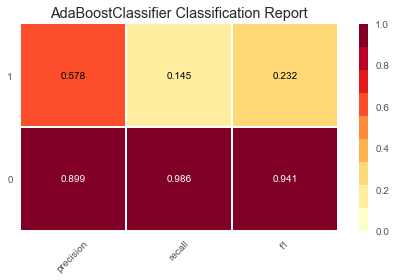

C:\Users\16099\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


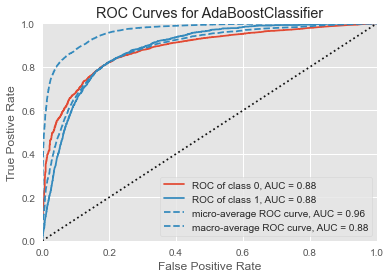

<AxesSubplot:title={'center':'ROC Curves for AdaBoostClassifier'}, xlabel='False Positive Rate', ylabel='True Postive Rate'>

In [676]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(AdaBoostClassifier(n_estimators= 100, learning_rate=0.1, random_state=22))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(AdaBoostClassifier(n_estimators= 100, learning_rate=0.1, random_state=22))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

Bagging Classifier Algorithm

In [677]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(X_train, y_train)

In [678]:
pred_BG = bgcl.predict(X_test)
acc_BG = accuracy_score(y_test, pred_BG)

In [679]:
# Confusion matrix
pd.crosstab(y_test, pred_BG, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,11530,483
1,873,678


In [680]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_BG]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logistic Regression,0.89
0,Decision Tree,0.89
0,Random Forest,0.90
0,Bagging,0.90


C:\Users\16099\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


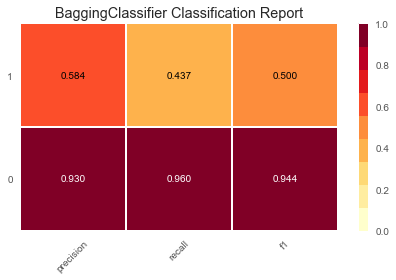

C:\Users\16099\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


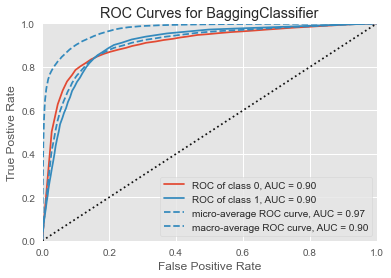

<AxesSubplot:title={'center':'ROC Curves for BaggingClassifier'}, xlabel='False Positive Rate', ylabel='True Postive Rate'>

In [681]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

Make a DataFrame to compare models and their metrics. Give conclusion regarding the best algorithm and your reason behind it

In [682]:
resultsDf

,Method,accuracy
0,Logistic Regression,0.89
0,Decision Tree,0.89
0,Random Forest,0.90
0,Bagging,0.90


- Logistic Regression - 1137 is mislcassified as No Term deposit , but these will enroll for term deposit 
- Decission Tree - 1277 is misclassifed as No Term deposit , but these will enroll for term deposit
- Random Forest - 971  is misclasiifed as No Term deposit , but these will enroll for term depositin
- Boosting -- 1323 misclassified is misclassified as No Term deposit , but these will enroll for term deposit 
- Bagging -- 873 misclassified  is misclassifed as No Term deposit , but these will enroll for term deposit

- Logistic Regression	 89% Accuracy
- Decision Tree	89% Accuracy
- Random Forest	90% Accuracy
- Adaboost	89% Accuracy
- Bagging	90% Accuracy

##### Random Forest and bagging seems to better in terms of accuracy, recall  and also have less false negative compare to  other